In [1]:
#Essential Data Cleaning in Python


In [2]:
#TABLE OF CONTENTS
#1. Bad data
#2. Error detection
#3. Error prevention
#4. Error correction
#https://www.linkedin.com/learning/data-cleaning-in-python-essential-training?contextUrn=urn%3Ali%3AlyndaLearningPath%3A5ec59c4a498e70845153bbc5&u=2043324
#a) note packages are installed and/or imported in the relevant sections as needed

In [3]:
#1. Bad data start

In [4]:
#Missing data
import pandas as pd

df_missingvalues = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_02/cart.csv')
print(df_missingvalues)

         date    name  amount  price
0  2021-03-01  carrot     7.0   5.73
1  2021-03-01     egg    12.0   1.70
2  2021-03-01    milk     NaN   3.57
3  2021-03-01  potato     2.0    NaN
4         NaN  tomato     6.0   1.52
5  2021-03-02  potato     3.0   2.17
6  2021-03-03     NaN     5.0   3.68


In [5]:
df_missingvalues.dtypes

date       object
name       object
amount    float64
price     float64
dtype: object

In [6]:
#Duplicate data
df_duplicatevalues = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_04/cart.csv', parse_dates=['date'])
df_duplicatevalues

df_duplicatevalues.duplicated()


df_duplicatevalues.duplicated(['date', 'name'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [7]:
#Data with bad values
df_badvalues = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_03/metrics.csv')
print(df_badvalues)

                       time name         value
0   2021-07-13 14:36:52.380  mem  2.275172e+08
1   2021-07-13 14:36:52.380  cpu  3.157000e+01
2   2021-07-13 14:36:53.337  mem  2.275192e+08
3   2021-07-13 14:36:53.337  cpu  3.009000e+02
4   2021-07-13 14:36:54.294  mem  2.275157e+08
..                      ...  ...           ...
95  2021-07-13 14:37:37.359  mem  2.274985e+08
96  2021-07-13 14:37:38.316  cpu  3.507000e+01
97  2021-07-13 14:37:38.316  mem  2.274929e+08
98  2021-07-13 14:37:39.273  mem  2.274967e+08
99  2021-07-13 14:37:39.273  cpu  3.477000e+01

[100 rows x 3 columns]


,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


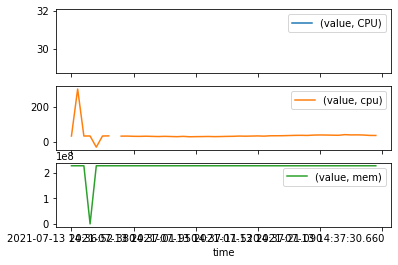

In [8]:
df_badvalues.sample(10)

df_badvalues.groupby('name').describe()

df_badvalues['name'].value_counts()

pd.pivot(df_badvalues, index='time', columns='name').plot(subplots=True)

df_badvalues.query('name == "cpu" & (value < 0 | value > 100)')

mem = df_badvalues[df_badvalues['name'] == 'mem']['value']
z_score = (mem - mem.mean())/mem.std()
bad_mem = mem[z_score.abs() > 2]

df_badvalues.loc[bad_mem.index]

In [9]:
#1. Bad data end

In [10]:
#2. Error detection start
#schemas
df_schemas = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_01/ships.csv')
print(df_schemas)
df_schemas.dtypes

              name        lat        lng
0      Black Pearl  20.664865 -80.709747
1            Cobra  20.664868 -80.709740
2  Flying Dutchman  20.664878 -80.709941
3          Empress        NaN        NaN


name     object
lat     float64
lng     float64
dtype: object

In [11]:
#pip install pandera

In [12]:
#validation
import pandera as pa
import numpy as np

schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(pa.Float, nullable = True),
    'lng': pa.Column(pa.Float, nullable = True),
})

df_validate = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_02/ships.csv')
schema.validate(df_validate)

ImportError: cannot import name dataclass_transform

In [ ]:
#Finding missing data
df_missingdata = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_03/ships.csv')

df_missingdata[df_missingdata.isnull().any(axis=1)]

df_missingdata.iloc[-1]['name']

df_missingdata['name'] = df_missingdata['name'].str.strip()
df_missingdata.iloc[-1]['name']


df_missingdata[df_missingdata.isnull().any(axis=1)]

mask = df_missingdata['name'].str.strip() == ''
df_missingdata.loc[mask, 'name'] = np.nan
# %%

df_missingdata[df_missingdata.isnull().any(axis=1)]

In [ ]:
#Exploiting domain knowledge
df_domain = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_04/ships.csv')
df_domain

In [ ]:
schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(
        pa.Float,
        nullable=True,
        checks=pa.Check(
            lambda v: v >= -90 and v <= 90,
            element_wise=True,
        ),
    ),
    'lng': pa.Column(
        pa.Float,
        nullable=True,
        checks=pa.Check(
            lambda v: v >= -180 and v <= 180,
            element_wise=True,
        ),
    ),
})

schema.validate(df_domain)

In [ ]:
#subgroups within height data
df_height = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_05/heights.csv')
df_height

In [ ]:
max_heights = pd.DataFrame([
[1, 32],
], columns=['grade', 'max_height'])
max_heights

# %%
mdf = pd.merge(df_height, max_heights, how='left')
mdf

# %%
df_height[mdf['height'] > mdf['max_height']]

In [ ]:
#Challenge
# Find out all the rows that have bad values
# - Missing values are not allowed
# - A plate must be a combination of at least 3 upper case letters or digits
# - Distance much be bigger than 0
df_challenge3 = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/challenge/rides.csv')
df_challenge3

In [ ]:
null_mask = df_challenge3.isnull().any(axis=1)
df_challenge3[null_mask]

In [ ]:
plate_mask = ~df_challenge3['plate'].str.match(r'^[0-9A-Z]{3,}', na=False)
df_challenge3[plate_mask]

In [ ]:
dist_mask = df_challenge3['distance'] < 0
df_challenge3[dist_mask]

In [ ]:
mask = null_mask | plate_mask | dist_mask
df_challenge3[mask]

In [ ]:
#2. Error detection end

In [ ]:
#pip install pyarrow

In [ ]:
#3. Error prevention start
size = 5
df = pd.DataFrame({
    'time': pd.date_range('2021', freq='17s', periods=size),
    'name': ['cpu'] * size,
    'value': np.random.rand(size) * 40,
})
df

In [ ]:
import pyarrow as pa

schema = pa.schema([
    ('time', pa.timestamp('ms')),
    ('name', pa.string()),
    ('value', pa.float64()),
])

In [ ]:
out_file = 'metrics.parquet'
df.to_parquet(out_file, schema=schema)

In [ ]:
pd.read_parquet(out_file)

In [ ]:
#illustrating the error of casting time as a string
#df['time'] = df['time'].astype(str)
#df.to_parquet(out_file, schema=schema)

In [ ]:
#processing and quality metrics
df_orders = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch04/04_06/orders.csv', parse_dates=['time'])
df_orders

# %%
def is_valid_row(row):
    if row['time'] < pd.Timestamp('1900'):
        return False

    if pd.isnull(row['symbol']) or row['symbol'].strip() == '':
        return False

    if row['price'] <= 0:
        return False

    return True


ok_df = df_orders[df_orders.apply(is_valid_row, axis=1)]

# %%
num_bad = len(df) - len(ok_df)
percent_bad = num_bad/len(df) * 100
print(f'{percent_bad:.2f}% bad rows')
if num_bad > 0:
    bad_rows = df[~df.index.isin(ok_df.index)]
    print('bad rows:')
    print(bad_rows)

In [ ]:
#3. Error prevention end


In [ ]:
#4. Error correction start
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_01/weather.csv', parse_dates=['DATE'])
df



In [ ]:
df.rename(columns={
    'DATE': 'date',
    'TMIN': 'min_temp',
    'TMAX': 'max_temp',
}, inplace=True)
df

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_01/donations.csv')
df

In [ ]:
import re

def fix_col(col):
    """Fix column name
    >>> fix_col('1. First Name')
    'first_name'
    """
    return (
        re.sub(r'\d+\.\s+', '', col)
        .lower()
        .replace(' ', '_')
    )

df.rename(columns=fix_col, inplace=True)
df

In [ ]:
df_points = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_02/points.csv')
df_points.dtypes

def asint(val):
    return int(val, base=0)

df_points['color'] = df_points['color'].apply(asint)
df_points.dtypes

In [ ]:
bools = {
    'yes': True,
    'no': False,
}
df_points['visible'] = df_points['visible'].map(bools)
df_points.dtypes

In [ ]:
df_points

In [ ]:
#4. Error correction end